# Анализы

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [63]:
# Загрузка данных из файлов JSON
article_data = pd.read_json('article_data.json')
article_information = pd.read_json('article_information.json')

# Объединение данных по заголовку (title)
combined_data = pd.merge(article_data, article_information, on='title', how='inner')

# Просмотр первых строк объединенного DataFrame
print(combined_data.head())

                                               title  views published_date  \
0  Михаил Измайлов: «В 20 лет думал пойти работат...    128     12.09.2024   
1  Обновленные версии документов ИЗЛ и ТЗ на сайт...    855     11.09.2024   
2                     Делегация ФГР посетила Саратов    466     11.09.2024   
3  Актуализация данных региональных федераций ган...    593     10.09.2024   
4  Федерация гандбола Северной Осетии вошла в сос...    720     09.09.2024   

                                                link  \
0  https://rushandball.ru/publications/29249/mixa...   
1  https://rushandball.ru/publications/29248/obno...   
2  https://rushandball.ru/publications/29247/dele...   
3  https://rushandball.ru/publications/29246/aktu...   
4  https://rushandball.ru/publications/29245/fede...   

                                          name_title  \
0  Михаил Измайлов: «В 20 лет думал пойти работат...   
1  Обновленные версии документов ИЗЛ и ТЗ на сайт...   
2                     Деле

### 1. Тематический анализ

2. Классификация тематических категорий

In [74]:
def classify_category(row):
    # Пример классификации на основе заголовка и содержания
    if "чемпионат" in row['title'].lower() or "турнир" in row['article'].lower():
        return 'Чемпионаты и турниры'
    elif "интервью" in row['title'].lower() or "вопрос" in row['article'].lower():
        return 'Интервью'
    elif "результат" in row['title'].lower() or "итоги" in row['article'].lower():
        return 'Результаты'
    elif "новости" in row['title'].lower():
        return 'Новости'
    elif "обзор" in row['title'].lower():
        return 'Обзоры'
    else:
        return 'Другое'

# Применение функции классификации
combined_data['category'] = combined_data.apply(classify_category, axis=1)

3. Подсчет количества публикаций по категориям и их доли

In [75]:
# Подсчет количества публикаций по категориям
category_counts = combined_data['category'].value_counts()

# Подсчет общей суммы публикаций
total_publications = len(combined_data)

# Расчет доли каждой категории
category_shares = (category_counts / total_publications) * 100

In [76]:
print(category_counts)
print(category_shares)

category
Другое                  6
Чемпионаты и турниры    3
Интервью                3
Name: count, dtype: int64
category
Другое                  50.0
Чемпионаты и турниры    25.0
Интервью                25.0
Name: count, dtype: float64


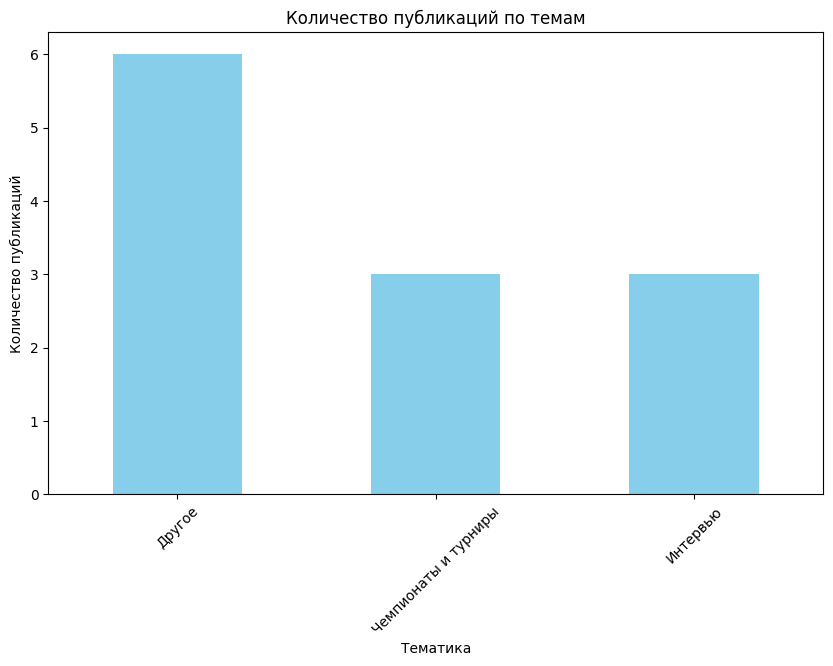

In [77]:
# График количества публикаций по категориям
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Количество публикаций по темам')
plt.xlabel('Тематика')
plt.ylabel('Количество публикаций')
plt.xticks(rotation=45)
plt.show()

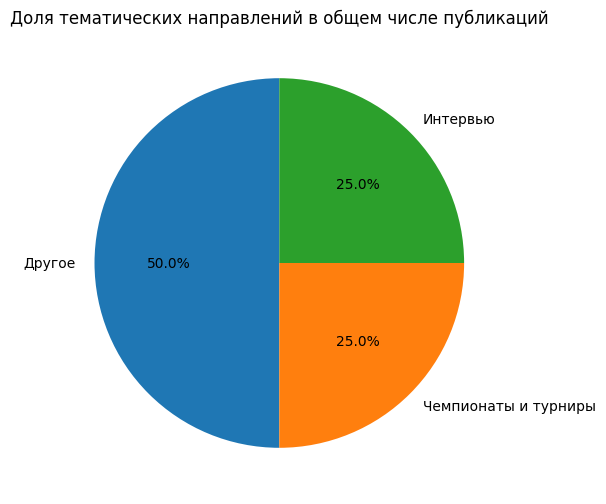

In [78]:
# График доли тематических направлений
plt.figure(figsize=(10, 6))
category_shares.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Доля тематических направлений в общем числе публикаций')
plt.ylabel('')
plt.show()

### 2. Временной анализ

2. Преобразование даты и извлечение дополнительных данных

In [79]:
# Преобразование 'published_date' в формат datetime
combined_data['published_date'] = pd.to_datetime(combined_data['published_date'])

# Извлечение года и месяца
combined_data['month'] = combined_data['published_date'].dt.month

3. Анализ динамики публикационной активности

In [80]:
# Подсчет общего количества публикаций по месяцам
monthly_counts = combined_data['month'].value_counts(sort=False)

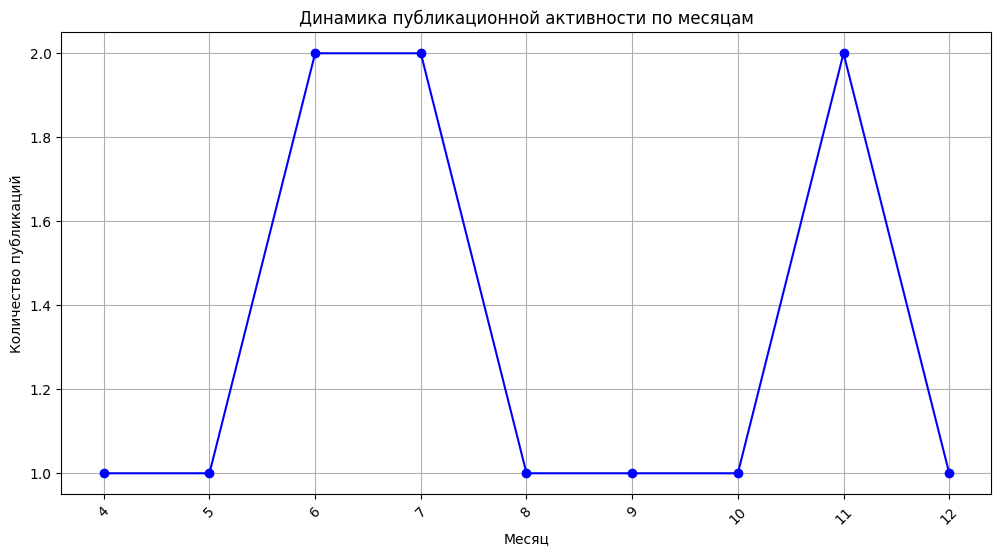

In [81]:
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='line', marker='o', color='blue')
plt.title('Динамика публикационной активности по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество публикаций')
plt.xticks(rotation=45)
plt.grid()
plt.show()

4. Выявление сезонных закономерностей

In [82]:
# Создаем индекс с месяцами от 1 до 12
month_names = ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек']
monthly_counts.index = monthly_counts.index.astype(int)  # Приводим индексы к целым числам, если не так
monthly_counts = monthly_counts.reindex(range(1, 13), fill_value=0)  # Заполняем недостающие месяцы нулями

# Переименуем индексы
monthly_counts.index = month_names

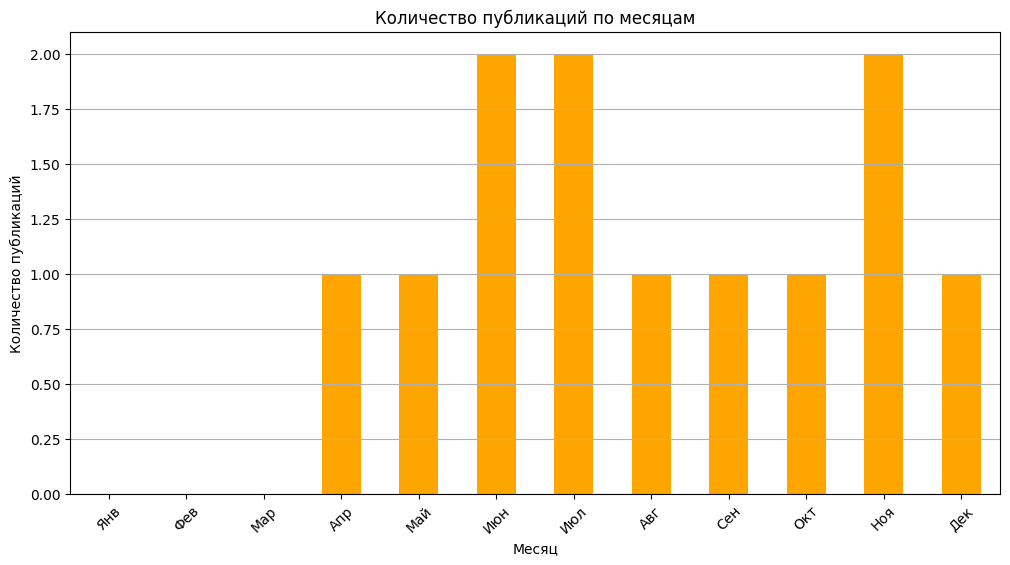

In [28]:
# Построение столбчатой диаграммы по месяцам
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='bar', color='orange')
plt.title('Количество публикаций по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество публикаций')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [29]:
# Подсчет доли публикаций по месяцам
monthly_share = (monthly_counts / monthly_counts.sum()) * 100

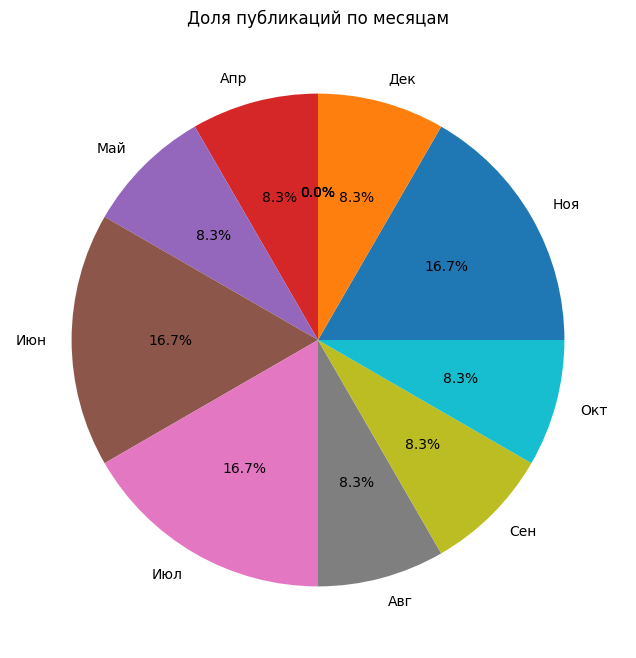

In [30]:
# Построение круговой диаграммы для доли публикаций
plt.figure(figsize=(8, 8))
monthly_share.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Доля публикаций по месяцам')
plt.ylabel('')
plt.show()

### 3. Анализ популярности

2. Определение самых популярных публикаций

In [83]:
# Определяем публикации с наибольшим количеством просмотров
top_views = combined_data[['title', 'views', 'published_date']].sort_values(by='views', ascending=False).head(10)

print("Топ 10 публикаций по просмотрам:")
print(top_views)

Топ 10 публикаций по просмотрам:
                                                title  views published_date
9             Итоги Мандатной комиссии сезона-2024/25   1761     2024-06-09
11                 Евгений Васильевич, поправляйтесь!   1617     2024-04-09
8   Южные женские команды открыли новый сезон OLIM...   1201     2024-06-09
7                         Поздравляем Татьяну Ерохину   1068     2024-07-09
6   «Молниеносные» продержались лишь 20 минут. «Ро...   1047     2024-07-09
1   Обновленные версии документов ИЗЛ и ТЗ на сайт...    855     2024-11-09
10  «Пермские медведи» оштрафованы на 15 тысяч рублей    794     2024-05-09
5                 Новый «Зенит» снова победил в Перми    748     2024-08-09
4   Федерация гандбола Северной Осетии вошла в сос...    720     2024-09-09
3   Актуализация данных региональных федераций ган...    593     2024-10-09


3. Поиск факторов, влияющих на популярность

3.1 Тематика и заголовки

In [84]:
# Для начала добавим добавим длину статьи и заголовка для анализа
combined_data['title_length'] = combined_data['title'].str.len()
combined_data['article_length'] = combined_data['article'].str.len()

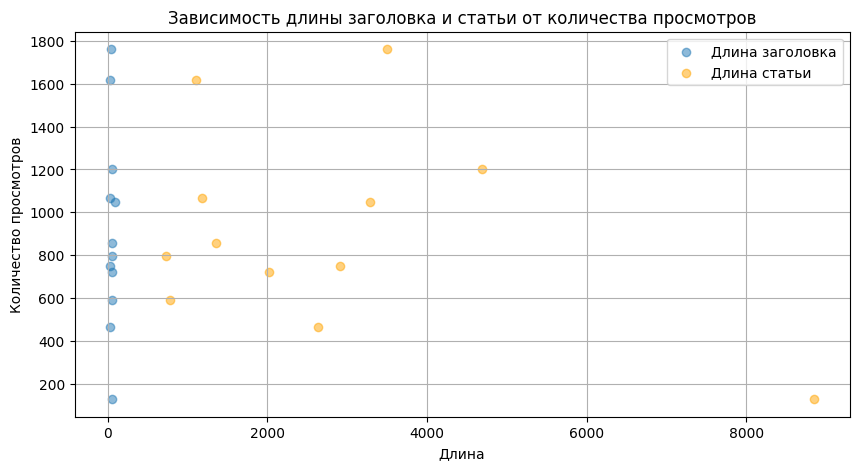

In [37]:
plt.figure(figsize=(10, 5))
plt.scatter(combined_data['title_length'], combined_data['views'], alpha=0.5, label='Длина заголовка')
plt.scatter(combined_data['article_length'], combined_data['views'], alpha=0.5, label='Длина статьи', color='orange')
plt.title('Зависимость длины заголовка и статьи от количества просмотров')
plt.xlabel('Длина')
plt.ylabel('Количество просмотров')
plt.legend()
plt.grid()
plt.show()

3.2 Анализ публикаций по дате

In [38]:
# Преобразуем 'published_date' в формат datetime
combined_data['published_date'] = pd.to_datetime(combined_data['published_date'])

# Извлекаем день недели для анализа
combined_data['weekday'] = combined_data['published_date'].dt.day_name()

# Оцениваем среднее количество просмотров по дням недели
weekday_analysis = combined_data.groupby('weekday')['views'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

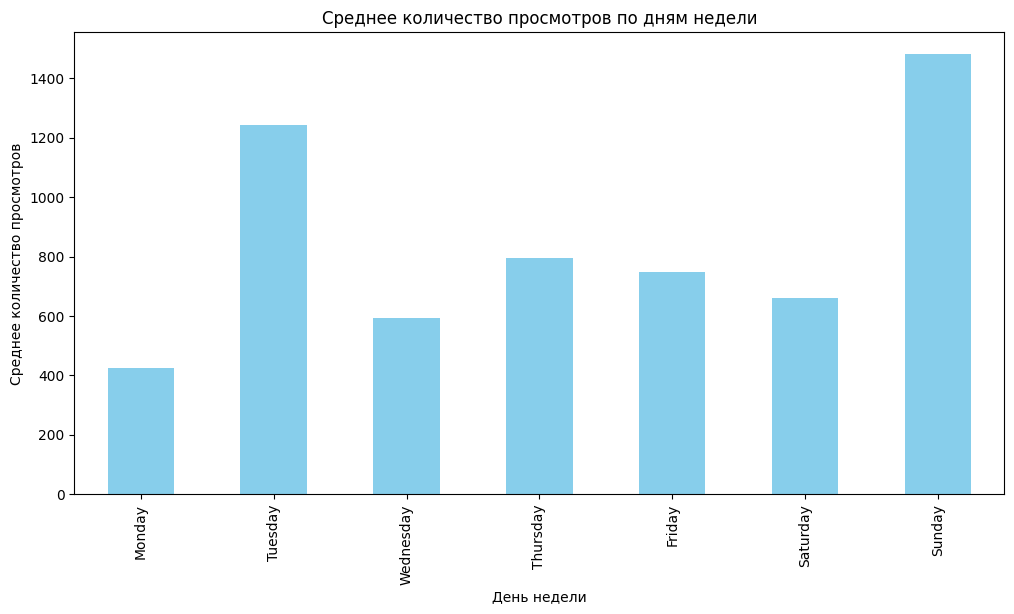

In [39]:
# Визуализация
weekday_analysis.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Среднее количество просмотров по дням недели')
plt.xlabel('День недели')
plt.ylabel('Среднее количество просмотров')
plt.show()

### 4. Выявление уникальных особенностей публикационной активности

2. Анализ частоты публикаций

In [85]:
# Преобразование колонки 'published_date' в тип datetime
combined_data['published_date'] = pd.to_datetime(combined_data['published_date'])

# Группировка данных по месяцам
monthly_publications = combined_data.resample('M', on='published_date').size()

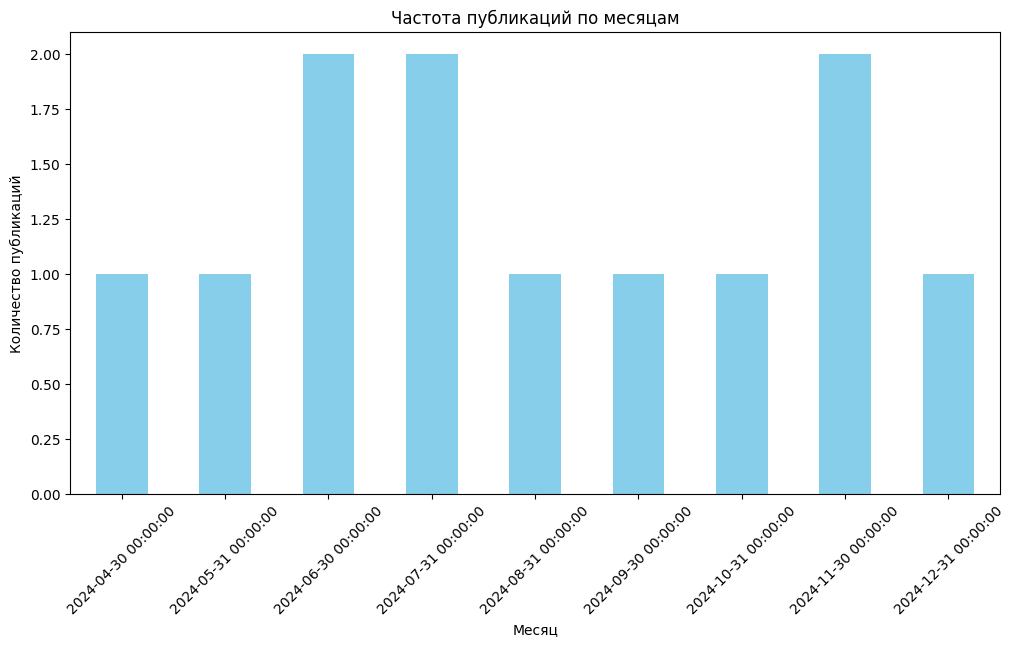

In [86]:
# Визуализация частоты публикаций
monthly_publications.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Частота публикаций по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество публикаций')
plt.xticks(rotation=45)
plt.show()

3. Тематика и содержание публикаций

In [87]:
russian_stop_words = [
    'я', 'ты', 'он', 'она', 'оно', 'мы', 'вы', 'они', 'мне', 'тебе', 'нем', 'ней',
    'это', 'как', 'что', 'где', 'кто', 'почему', 'да', 'нет', 'но', 'ли', 'в', 'во',
    'с', 'со', 'на', 'к', 'по', 'из', 'от', 'для', 'у', 'за', 'над', 'при', 'между'
]

In [88]:
# Создание экземпляра CountVectorizer с русскими стоп-словами
vectorizer = CountVectorizer(stop_words=russian_stop_words)
X = vectorizer.fit_transform(combined_data['article'])

# Получение наиболее частых слов
word_counts = X.sum(axis=0)
words = vectorizer.get_feature_names_out()
word_counts_df = pd.DataFrame(word_counts, columns=words).T
top_words = word_counts_df.nlargest(20, 0).index

print("Топ 20 популярных слов в статьях:")
print(top_words)

Топ 20 популярных слов в статьях:
Index(['гк', 'не', 'россии', 'фгр', 'то', 'гандбола', 'динамо', 'ростов', 'до',
       'дон', 'медведи', 'же', 'кубань', 'сентября', 'olimpbet', 'после',
       'среди', 'цска', 'все', 'клуб'],
      dtype='object')


4. Уникальные форматы публикаций

In [52]:
# Анализ уникальных значений в колонках 'name_title' и 'article_subtitle'
unique_titles = combined_data['name_title'].nunique()
unique_subtitles = combined_data['article_subtitle'].nunique()

print(f"Количество уникальных заголовков: {unique_titles}")
print(f"Количество уникальных подзаголовков: {unique_subtitles}")

Количество уникальных заголовков: 12
Количество уникальных подзаголовков: 12


5. Взаимодействие с аудиторией

In [54]:
# Среднее количество просмотров
average_views = combined_data['views'].mean()
print(f"Среднее количество просмотров на публикацию: {average_views:.2f}")

Среднее количество просмотров на публикацию: 916.50


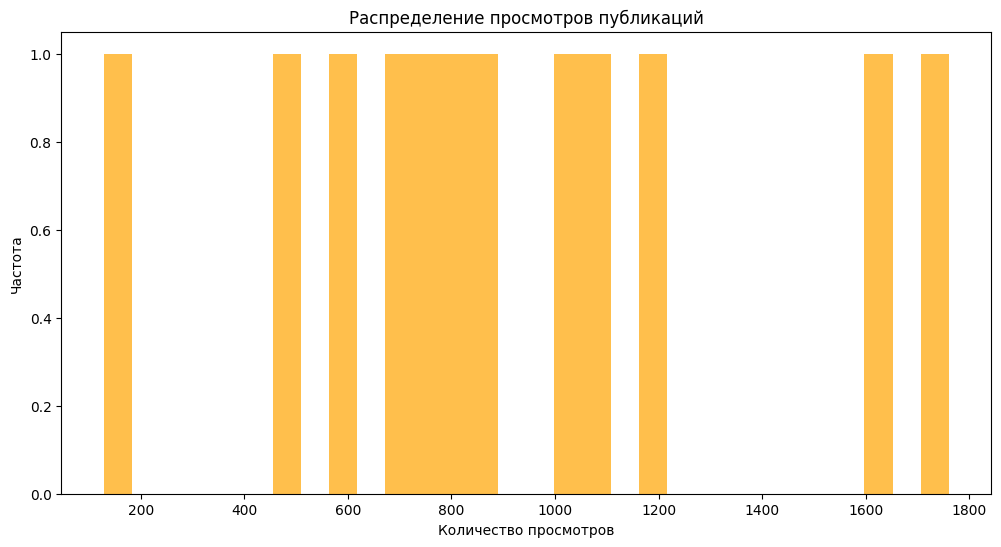

In [56]:
# Визуализация распределения просмотров
combined_data['views'].plot(kind='hist', bins=30, alpha=0.7, figsize=(12, 6), color='orange')
plt.title('Распределение просмотров публикаций')
plt.xlabel('Количество просмотров')
plt.ylabel('Частота')
plt.show()